# COMPUTER VISION

# Project - Face Detection

In this project OpenCV libraries such as Haar Cascade Classifier has been applied to detect the faces in an image. Eye Detection has also been applied using Haar Cascade classifier. 

**Part 1** : Investigating OpenCV, pre-processing, and face detection

* [Step 0](#step0): Detect Faces Using a Haar Cascade Classifier
* [Step 1](#step1): Add Eye Detection
* [Step 2](#step2): De-noise an Image for Better Face Detection
* [Step 3](#step3): Blur an Image and Perform Edge Detection
* [Step 4](#step4): Automatically Hide the Identity of an Individual

In [1]:
#Importing all the required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

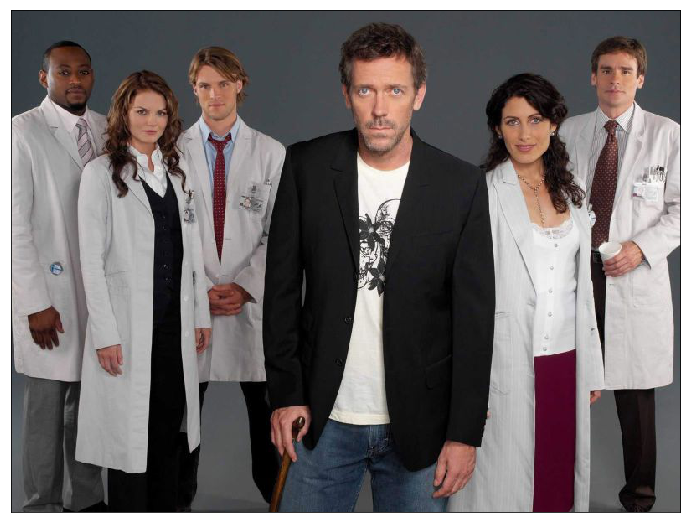

In [2]:
image = mpimg.imread('detect-facial-keypoints-master/images/house.jpg',0)
#cvt_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (12,10))
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.show()

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
faces = faces_cascade.detectMultiScale(gray, 1.1, 22)

Number of faces detected: 6


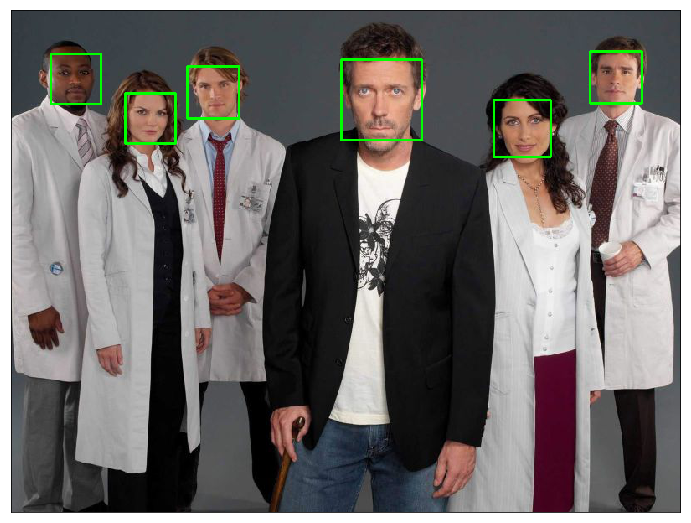

In [5]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)

print('Number of faces detected:', len(faces))
plt.figure(figsize = (12,10)) 
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.show()

# EYE DETECTION

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
image_1 = mpimg.imread('detect-facial-keypoints-master/images/rock.jpg')
gray_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

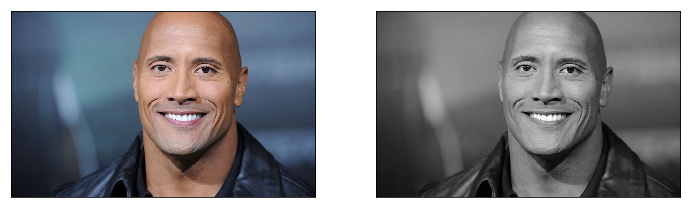

In [8]:
plt.figure(figsize = (12,10))
plt.subplot(121)
plt.imshow(image_1)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(gray_1, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
eyes_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
eyes = eyes_cascade.detectMultiScale(gray_1, 1.2, 22)
#smile = smile_cascade.detectMultiScale(gray_1, 1.2, 25)

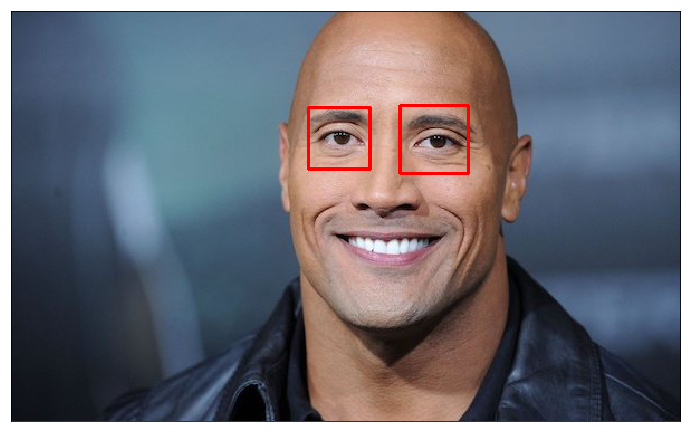

In [10]:
for (ex ,ey, ew, eh) in eyes:
    cv2.rectangle(image_1, (ex, ey), (ex+ew, ey+eh), (255,0,0), 2)
    
plt.figure(figsize = (12,10))
plt.xticks([])
plt.yticks([])
plt.imshow(image_1)
plt.show()

# FACE AND EYE DETECTION USING WEBCAM 

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
### Add face and eye detection to this laptop camera function 

def detection(frame, gray):
    face_cas = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eyes_cas = cv2.CascadeClassifier('haarcascade_eye.xml')
    
    faces = face_cas.detectMultiScale(gray, 1.1, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
        roi_color = frame[y:y+h, x:x+w]
        roi_gray = gray[y:y+h, x:x+w]
        
        eyes_cas = cv2.CascadeClassifier('haarcascade_eye.xml')
        eyes = eyes_cas.detectMultiScale(roi_gray, 1.1, 22)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
            
        smile_cas = cv2.CascadeClassifier('haarcascade_smile.xml')
        smile = smile_cas.detectMultiScale(roi_gray, 1.1, 30)
        for (ex, ey, ew, eh) in smile:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
            
    return frame
        
cap = cv2.VideoCapture(0)

while True:
    _,frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    canv = detection(frame, gray)
    cv2.imshow('Video', canv) 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break # 

cap.release()
cv2.destroyAllWindows() 

# De-noise an Image for Better Face Detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection. While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice!

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in. This sort of cleaning - referred to as pre-processing - can include a number of cleaning phases like blurring, de-noising, color transformations, etc., and many of these tasks can be accomplished using OpenCV.

In this short subsection we explore OpenCV's noise-removal functionality to see how we can clean up a noisy image, which we then feed into our trained face detector.


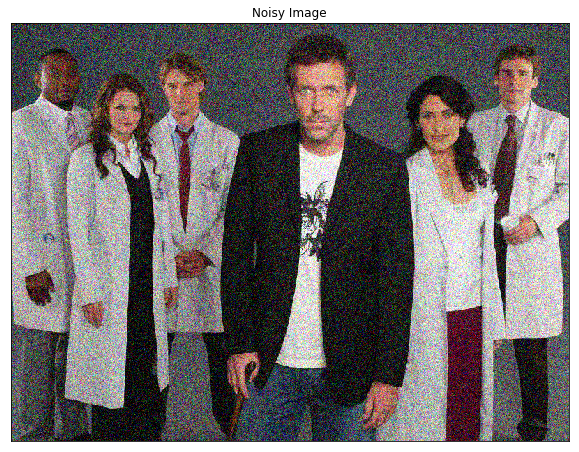

In [13]:
#ADDING ARTIFICIAL NOISE TO THE IMAGE
# Load in the multi-face test image again
image = cv2.imread('detect-facial-keypoints-master/images/house.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 40
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

Number of faces detected: 5


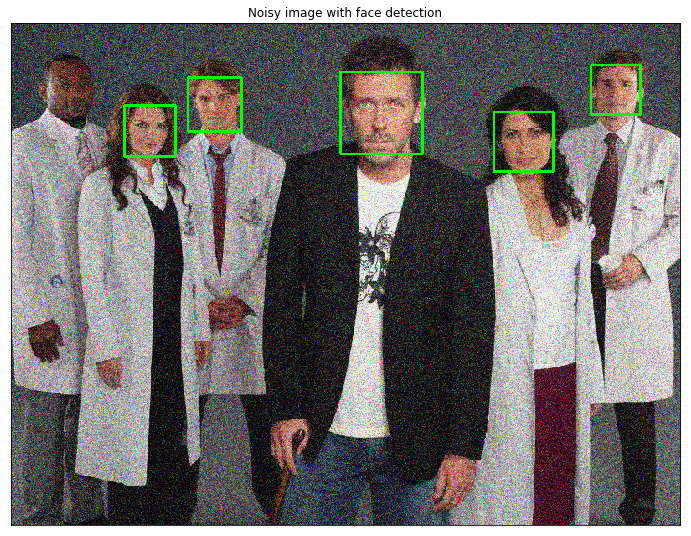

In [14]:
gray = cv2.cvtColor(image_with_noise, cv2.COLOR_BGR2GRAY)

faces_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = faces_cascade.detectMultiScale(gray, 1.1, 22)
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_noise, (x,y), (x+w, y+h), (0,255,0), 2)

print('Number of faces detected:', len(faces))
plt.figure(figsize = (12,10)) 
plt.title('Noisy image with face detection')
plt.xticks([])
plt.yticks([])
plt.imshow(image_with_noise)
plt.show()

With this added noise we now miss one of the faces!

# De-noise this image for better face detection

Number of faces detected: 5


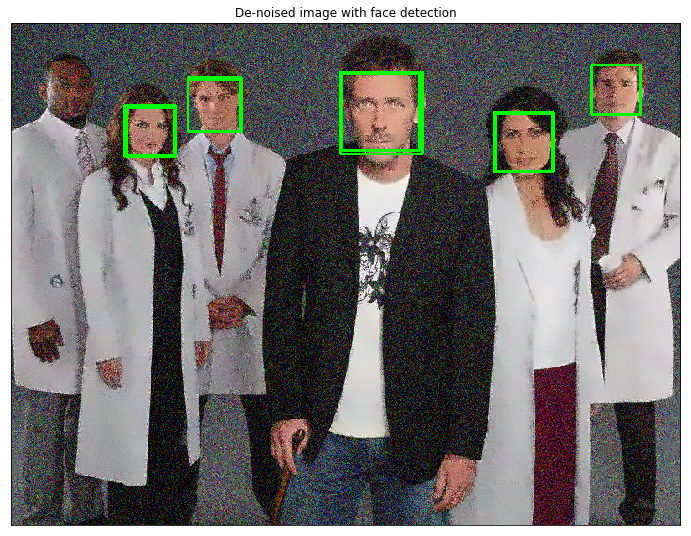

In [15]:
#Use OpenCV's built in color image de-noising function to clean up our noisy image!

denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise,None,12,12,7,21)

gray = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)

faces_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = faces_cascade.detectMultiScale(gray, 1.1, 10)
for (x, y, w, h) in faces:
    cv2.rectangle(denoised_image, (x,y), (x+w, y+h), (0,255,0), 2)

print('Number of faces detected:', len(faces))
plt.figure(figsize = (12,10)) 
plt.title('De-noised image with face detection')
plt.xticks([])
plt.yticks([])
plt.imshow(denoised_image)
plt.show()

# EDGE DETECTION WITHOUT BLURRING THE IMAGE

Importance of Blur in Edge Detection

Edge detection is a concept that pops up almost everywhere in computer vision applications, as edge-based features (as well as features built on top of edges) are often some of the best features for e.g., object detection and recognition problems.

Edge detection is a dimension reduction technique - by keeping only the edges of an image we get to throw away a lot of non-discriminating information. And typically the most useful kind of edge-detection is one that preserves only the important, global structures (ignoring local structures that aren't very discriminative). So removing local structures / retaining global structures is a crucial pre-processing step to performing edge detection in an image, and blurring can do just that. 

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

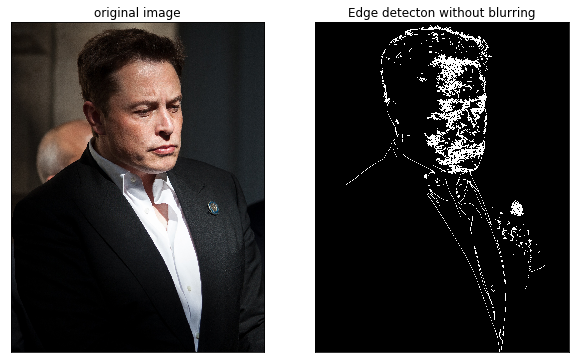

In [17]:
images = mpimg.imread('detect-facial-keypoints-master/images/elon.jpg',1)

cvt_image = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(cvt_image, 50, 200)

edges = cv2.dilate(canny, None)

plt.figure(figsize = (10,8))
plt.subplot(121)
plt.title('original image')
plt.xticks([])
plt.yticks([])
plt.imshow(images)

plt.subplot(122)
plt.title('Edge detecton without blurring')
plt.xticks([])
plt.yticks([])
plt.imshow(edges, cmap = 'gray')

plt.show()

# EDGE DETECTION WITH BLURRING THE IMAGE

In the next cell, you will repeat this experiment - blurring the image first to remove these local structures, so that only the important boudnary details remain in the edge-detected image.

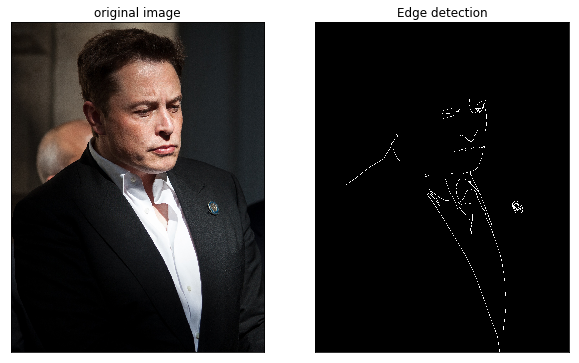

In [18]:
kernel = np.ones((4,4),np.float32)/16
blurred_image = cv2.filter2D(images, -1, kernel)

# Convert to RGB colorspace
image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,50,250)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

plt.figure(figsize = (10,8))
plt.subplot(121)
plt.title('original image')
plt.xticks([])
plt.yticks([])
plt.imshow(images)

plt.subplot(122)
plt.title('Edge detection')
plt.xticks([])
plt.yticks([])
plt.imshow(edges, cmap = 'gray')

plt.show()

# BLURR THE FACE - Automatically Hide the Identity of an Individual


If you film something like a documentary or reality TV, you must get permission from every individual shown on film before you can show their face, otherwise you need to blur it out - by blurring the face a lot (so much so that even the global structures are obscured)!  This is also true for projects like [Google's StreetView maps](https://www.google.com/streetview/) - an enormous collection of mapping images taken from a fleet of Google vehicles.  Because it would be impossible for Google to get the permission of every single person accidentally captured in one of these images they blur out everyone's faces, the detected images must automatically blur the identity of detected people.  Here's a few examples of folks caught in the camera of a Google street view vehicle.


Number of faces detected: 1


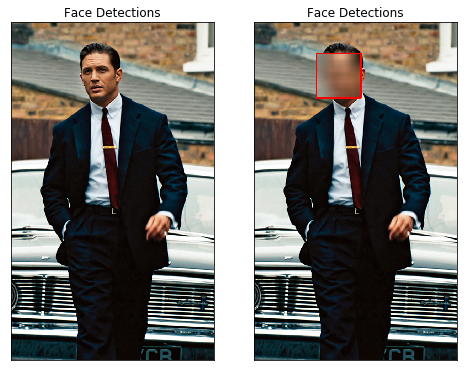

In [21]:
# Load in the image
image = mpimg.imread('detect-facial-keypoints-master/images/tom.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.2, 2)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

image_detect = np.copy(image)

## TODO: Blur the bounding box around each detected face using an averaging filter and display the result
# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    crop_img = image[y:y+h, x:x+w]
    crop_blurred_img = cv2.blur(crop_img, (50,50))
    image_detect[y:y+h, x:x+w] = crop_blurred_img
    cv2.rectangle(image_detect, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
plt.figure(figsize = (8,8))

plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.title('Face Detections')
plt.imshow(image)

plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.title('Face Detections')
plt.imshow(image_detect)